In [51]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from skimage import transform

### Данные:
Будем работать с датасетом [FashionMNIST](https://github.com/zalandoresearch/fashion-mnist). 

In [2]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

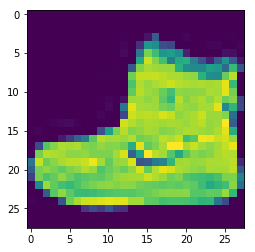

In [3]:
plt.imshow(X_train[0].reshape([28,28]))
plt.show()

### Задание:
Будем решать задачу классификации на 10 классов. Каждый класс соответствует одному из типов одежды. Исходная размерность признакового пространства: `784`, каждый пиксель является признаком. Будем снижать размерность признакового пространства с помощью метода главных компонент (`PCA`). Ваша задача оценить качество решенения задачи классификации по метрике `accuracy` в зависимости от числа главных компонент. Также оцените дисперсию функции качества в зависимости от числа главных компонент.

Нарисуйте график зависимости функции качества и ее дисперсии от числа главных компонент.

In [4]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [8]:
pca = PCA(n_components=3)
used_indices = np.random.choice(np.arange(X_train.shape[0]), 10000, replace=False)
X_train_lowdim = pca.fit_transform(X_train[used_indices].reshape([-1, 784]))
lr = LogisticRegression()
lr.fit(X_train_lowdim, y_train[used_indices])
accuracy_score(y_test, lr.predict(pca.transform(X_test.reshape([-1, 784]))))

0.57579999999999998

Используйте следующую сетку числа главных компонент: `[3, 5, 7, 12, 18, 25, 33, 40, 48, 55]`. Для ускорения сходимости можете семплировать подвыборки из `X_train`. 

In [15]:
def pca_scores(pca_val,X_train, y_train, X_test, y_test, train_size = 30000, test_size = 10000):
    
    pca = PCA(n_components=pca_val)
    used_indices = np.random.choice(np.arange(X_train.shape[0]), train_size, replace=False)
    X_train_lowdim = pca.fit_transform(X_train[used_indices].reshape([-1, 784]))
    
    lr = LogisticRegression()
    lr.fit(X_train_lowdim, y_train[used_indices])
    
    used_indices = np.random.choice(np.arange(X_test.shape[0]), test_size, replace=False)
    return accuracy_score(y_test, lr.predict(pca.transform(X_test.reshape([-1, 784]))))

In [40]:
pca_grid = [3, 5, 7, 12, 18, 25, 33, 40, 48, 55]
scores = []
repeats = 5

In [18]:
for pca_val in tqdm_notebook(pca_grid):
    local_scores = []
    for i in range(repeats):
        acc = pca_scores(pca_val, X_train, y_train, X_test, y_test)
        local_scores.append(acc)
    scores.append(local_scores)

In [22]:
accuracies = np.array(scores).mean(axis=1)
variances = np.array(scores).std(axis=1)**2

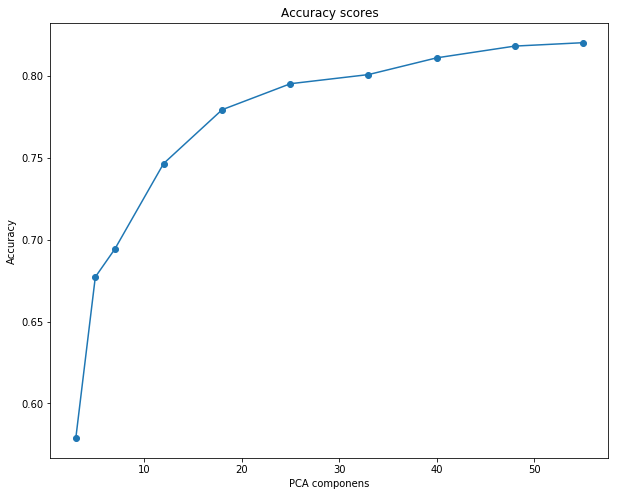

In [39]:
plt.figure(figsize=(10,8))
plt.plot(pca_grid, accuracies, 'o-')
plt.title('Accuracy scores')
plt.xlabel('PCA componens')
plt.ylabel('Accuracy')
plt.show()

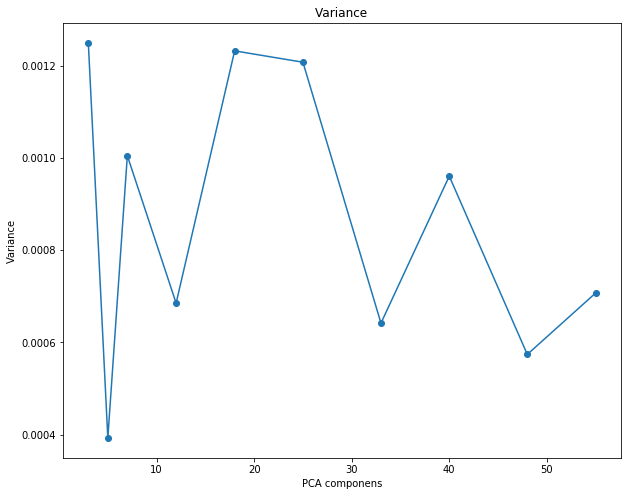

In [36]:
plt.figure(figsize=(10,8))
plt.plot(pca_grid, variances, 'o-')
plt.title('Variance')
plt.xlabel('PCA componens')
plt.ylabel('Variance')
plt.show()

## Задание 3

### For Train Set

In [86]:
pca_components = 50
all_runs = 5
acc = []
var = []
data_sizes = np.arange(500, 10000, 500)
test_size = 10000

In [87]:
for train_size in tqdm_notebook(data_sizes):
    local_scores = []
    for run in range(all_runs):
        local_acc = pca_scores(pca_components, X_train, y_train, X_test, y_test, train_size, test_size)
        local_scores.append(local_acc)
    acc.append(np.mean(local_scores))
    var.append(np.var(local_scores))

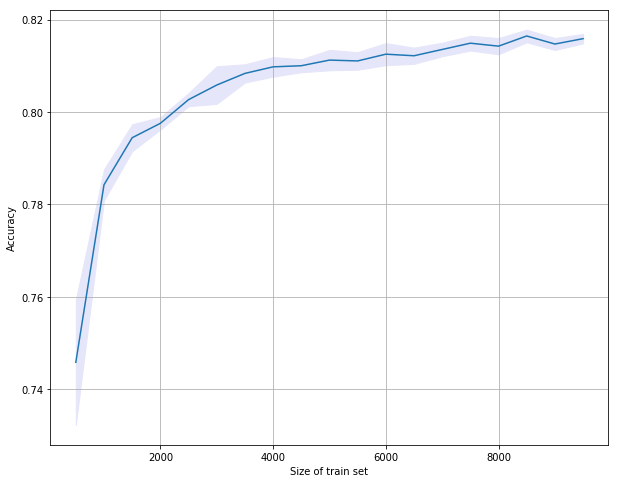

In [88]:
plt.figure(figsize=(10,8))
plt.plot(data_sizes, acc)
plt.fill_between(data_sizes, acc + np.sqrt(var), acc - np.sqrt(var), color='lavender')
plt.grid()
plt.xlabel("Size of train set")
plt.ylabel("Accuracy")
plt.show()

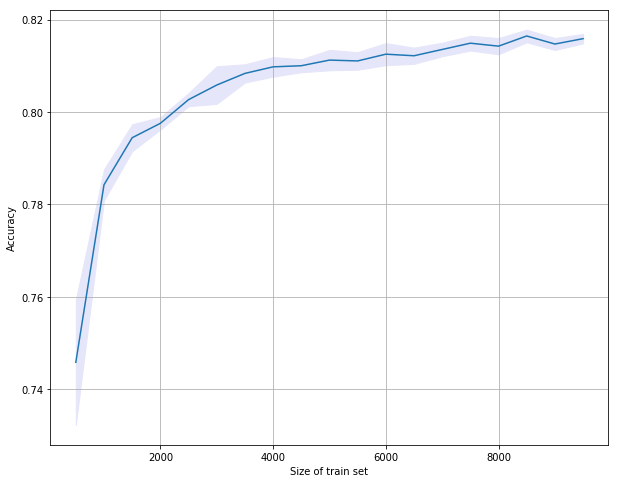

In [95]:
plt.figure(figsize=(10,8))
plt.plot(data_sizes, acc)
plt.fill_between(data_sizes, acc + np.sqrt(var), acc - np.sqrt(var), color='lavender')
plt.grid()
plt.xlabel("Size of train set")
plt.ylabel("Accuracy")
plt.savefig('acc_train_size.png')
plt.show()
#plt.savefig('acc_train_size.png')

### For Test Set

In [83]:
pca_components = 50
all_runs = 5
acc = []
var = []
data_sizes = np.arange(500, 10000, 500)
train_size = 10000

In [84]:
for test_size in tqdm_notebook(data_sizes):
    local_scores = []
    for run in range(all_runs):
        local_acc = pca_scores(pca_components, X_train, y_train, X_test, y_test, train_size, test_size)
        local_scores.append(local_acc)
    acc.append(np.mean(local_scores))
    var.append(np.var(local_scores))

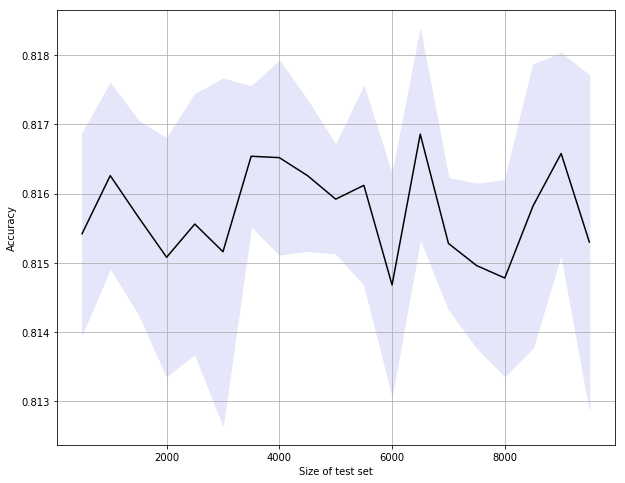

In [85]:
plt.figure(figsize=(10,8))
plt.plot(data_sizes, acc,  color='black')
plt.fill_between(data_sizes, acc + np.sqrt(var), acc - np.sqrt(var), color='lavender')
plt.grid()
plt.xlabel("Size of test set")
plt.ylabel("Accuracy")
plt.show()